# IMAGE CLASSIFICATION USING CIFAR10 DATASET

In [1]:
#IMPORTING ESSENTIAL LIBRARIES
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D ,MaxPooling2D

C:\Users\hp\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#IMPORTING DATASET
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

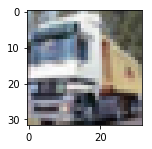

In [6]:
#SAMPLE VISUALISATION OF SINGLE DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
plt.subplot(330+1+1)
plt.imshow(x_train[1])
plt.show()

In [5]:
#NORMALISATION OF INPUT DATA
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
import keras

In [8]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [9]:
num_classes=y_train.shape[1]

In [10]:
#LAYERS OF THE MODEL
model=Sequential()
model = Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
model.add(Conv2D(32, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

    
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
    
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(num_classes, activation='softmax'))
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [12]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1.0e-4), 
              metrics = ['accuracy']) 

In [13]:
model_details = model.fit(x_train, y_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 100, # number of iterations
                    validation_data= (x_test, y_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 463s 9ms/step - loss: 1.9304 - acc: 0.2904 - val_loss: 1.6272 - val_acc: 0.4147
Epoch 2/100
50000/50000 [==============================] - 447s 9ms/step - loss: 1.5843 - acc: 0.4202 - val_loss: 1.4715 - val_acc: 0.4682
Epoch 3/100
50000/50000 [==============================] - 447s 9ms/step - loss: 1.4697 - acc: 0.4642 - val_loss: 1.3694 - val_acc: 0.5012
Epoch 4/100
50000/50000 [==============================] - 531s 11ms/step - loss: 1.3909 - acc: 0.4974 - val_loss: 1.2962 - val_acc: 0.5335
Epoch 5/100
50000/50000 [==============================] - 352s 7ms/step - loss: 1.3287 - acc: 0.5258 - val_loss: 1.2356 - val_acc: 0.5585
Epoch 6/100
50000/50000 [==============================] - 343s 7ms/step - loss: 1.2832 - acc: 0.5408 - val_loss: 1.1801 - val_acc: 0.5842
Epoch 7/100
50000/50000 [==============================] - 339s 7ms/step - loss: 1.2328 - acc: 0.5608 - val_loss: 1

In [15]:
#SAVING THE MODEL
model.save('final.h5')

In [1]:
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

C:\Users\hp\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)


In [3]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [4]:
#LOADING THE SAVED MODEL
model = load_model('final.h5') 

In [5]:
#TESTING ACCURACY ON TEST DATA
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 69.200


In [6]:
#ACCURACY OF MODEL IN TRAIN DATA
_, acc = model.evaluate(trainX, trainY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 83.394
